In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='2004.04168'

# Code-generation prompts

In [71]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [7]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the
Let's analyze the Hamiltonian equation step by step to answer the questions and generate the appropriate Python code.

### QUESTION 1: Dimension and Basis Order
From the Hamiltonian equation, I need to identify the dimension and basis order. The Hamiltonian includes terms with $c^\dagger_s(k)$ and $c_s(k)$ operators, where $s$ seems to be a spin or flavor index. There's no explicit mention of multiple flavors beyond $s$, so it appears we have a single flavor type with different possible values.

From the notation, I see:
- The operators are $c^\dagger_s(k)$ and $c_s(k)$, where $s$ is likely a spin index (up/down) or a flavor index.
- There's no explicit mention of how many values $s$ can take, but typically in condensed matter physics, $s$ often refers to spin, which would mean $|s| = 2$ (up and down).

So, the tuple of flavors (D) would be (|s|), which is likely (2) if $s$ represents spin. The basis order would be 

In [8]:
print(generated_code['thinking'])

Let's analyze the Hamiltonian equation step by step to answer the questions and generate the appropriate Python code.

### QUESTION 1: Dimension and Basis Order
From the Hamiltonian equation, I need to identify the dimension and basis order. The Hamiltonian includes terms with $c^\dagger_s(k)$ and $c_s(k)$ operators, where $s$ seems to be a spin or flavor index. There's no explicit mention of multiple flavors beyond $s$, so it appears we have a single flavor type with different possible values.

From the notation, I see:
- The operators are $c^\dagger_s(k)$ and $c_s(k)$, where $s$ is likely a spin index (up/down) or a flavor index.
- There's no explicit mention of how many values $s$ can take, but typically in condensed matter physics, $s$ often refers to spin, which would mean $|s| = 2$ (up and down).

So, the tuple of flavors (D) would be (|s|), which is likely (2) if $s$ represents spin. The basis order would be the ordering of the spin states, typically spin-up (↑) and spin-down (↓

In [9]:
print(generated_code['text'])

# Answer:

1) Number of Flavors, D = (2,)
   Basis Order:
   0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Diagonal density expectation value for spin s at k1",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Off-diagonal density expectation value between spins s and s' at k1"
   }
  
   TERMS:
   - E_s(k) c^\dagger_s(k) c_s(k) -> H[s, s, k], NI (Kinetic energy term for spin s)
   - U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2) -> H[s', s', k2], I (Hartree term)
   - -U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2) -> H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and interactions.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict

In [10]:
code = utils_auto.extract_code(generated_code['text'])

In [11]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and interactions.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system.
    """
    def __init__(self, N_shell: int = 5, parameters: dict[str, Any] = None, filling_factor: float = 0.5):
        if parameters is None:
            parameters = {'t_up': 1.0, 't_down': 1.0, 'U_0': 1.0, 'U_1': 0.5, 'a': 1.0}
        
        self.lattice = 'triangular'
        self.D = (2,)  # Spin-up and spin-down
        self.basis_order = {'0': 'spin'}
        # Order for each flavor: 0 = up, 1 = down

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0  # Zero temperature
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.pr

In [12]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_8.py


# Code evaluation

In [13]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [14]:
import importlib

In [15]:
module = importlib.import_module(code_path)

In [16]:
import HF

## Task 1: Check k-space

In [17]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

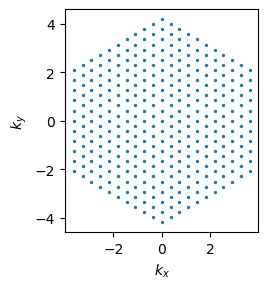

In [18]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [47]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [48]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [49]:
h_nonint = ham.generate_non_interacting()

In [50]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

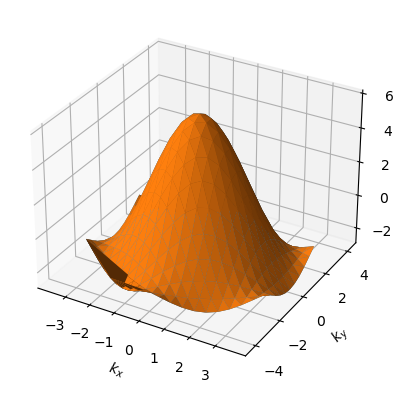

In [51]:
utils_auto.plot_2d_bandstructure(ham,en)

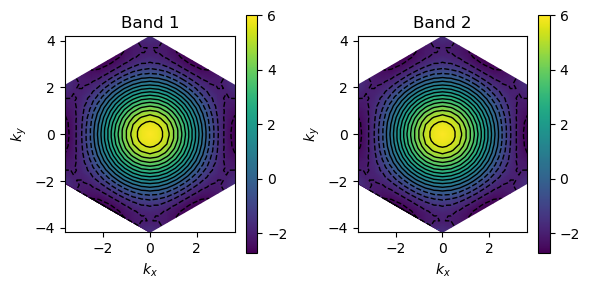

In [52]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [53]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [54]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [55]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


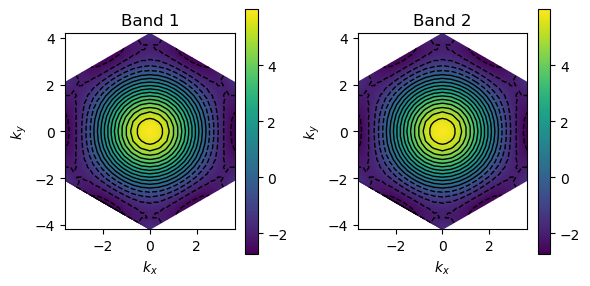

In [56]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [57]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [58]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [59]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


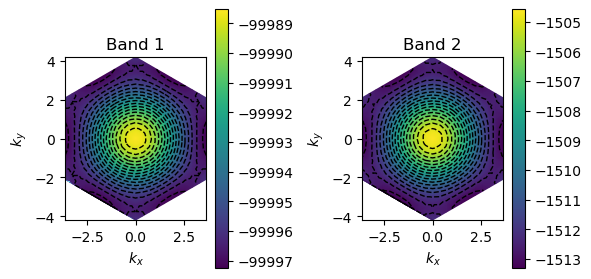

In [60]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [61]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98475.22
U/T is 24623.04
mean_U is 25075.07


# Auto eval

## Task 1

In [ ]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md',paper=paper)
    )


#################### THINKING ####################

Alright, I'm being asked to evaluate an image base
Alright, I'm being asked to evaluate an image based on a specific rubric for a condensed matter physics problem. Let me break down the task.

First, let's identify what's shown in the image:
- The image shows a set of blue dots arranged in a hexagonal pattern in the (k_x, k_y) plane.
- The x-axis is labeled k_x and the y-axis is labeled k_y.
- The dots are arranged in a regular pattern with approximate boundaries of (-3, 3) on the k_x axis and (-4, 4) on the k_y axis.

Now, let's check against the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image does show a momentum space mesh (k-space).
   - For a triangular lattice, the first Brillouin zone is a hexagon, which is indeed what appears to be depicted in this image.

2. "You need to check the point group symmetry."
   - The triangular lattice has a six-fold ro

In [63]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [ ]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md',paper=paper)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the image of the band structure plots shown and systematically check each point in the rubric:

1. First, I need to identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that both plots (Band 1 and Band 2) have a hexagonal boundary. This is indeed the correct Brillouin zone shape for a triangular lattice. The first Brillouin zone of a triangular lattice is a regular hexagon, which is exactly what we see in both plots. So this point is correct.

2. Next, I need to examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (depicted in yellow) are at the center of both plots, around the point (0,0) which corresponds to the Γ point in reciprocal space.

2.2 Trace the pattern of energy variation across the zone
The energ

In [65]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [ ]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md',paper=paper)
    )


#################### THINKING ####################

I need to analyze
I need to analyze this image showing band structure plots for two bands in the first Brillouin zone, and determine if they correctly represent the expected results from a Hartree-Fock calculation on a triangular lattice with infinitesimal interaction.

Let me go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The image shows two plots labeled "Band 1" and "Band 2", each with a hexagonal boundary. This matches what's expected for a triangular lattice, as the first Brillouin zone of a triangular lattice is indeed hexagonal. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In both Band 1 and Band 2, the highest energy regions (yellow) appear to be at the center of the hexagon, around (kx=0, k

In [67]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [ ]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md',paper=paper,U_int=1e5)
    )


#################### THINKING ####################

I
I need to analyze the false color plots in the image to evaluate whether they show the expected band structure for an interacting system on a triangular lattice after Hartree-Fock calculation. Let me work through the rubric points:

1. **Shape of the Brillouin zone boundary**:
The image shows two hexagonal plots labeled "Band 1" and "Band 2". The Brillouin zone is clearly hexagonal, which is indeed the expected shape for a triangular lattice in reciprocal space. So this point appears correct.

2. **Symmetry of the energy distribution**:

2.1 Highest energy regions (yellow): In both bands, the highest energy (yellow) regions are concentrated at the center of the Brillouin zone (around k = 0).

2.2 Pattern of energy variation: The energy decreases radially outward from the center, with concentric rings of decreasing energy (going from yellow to blue to purple).

2.3 Rotational symmetries: The energy distribution appears to have six-f

In [69]:
answer4=utils_auto.extract_result_content(result4['text'])

In [70]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
